In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

# Modelling
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 5)})

## Feature Engineering

In [24]:
train = pd.read_csv('train.csv', parse_dates=['Date'])

In [25]:
train['Date'] =  train.Date.dt.strftime('%Y-%U')
train = train.set_index(['Date'])[['Weekly_Sales']]
print('\n TRAIN')
print(train.shape)
print(train.head())
print('\n TRAIN GROUPED')
walmart_weekly_sales = train.groupby(by=train.index).sum()
print(walmart_weekly_sales.shape)
print(walmart_weekly_sales.head())


 TRAIN
(421570, 1)
         Weekly_Sales
Date                 
2010-05      24924.50
2010-06      46039.49
2010-07      41595.55
2010-08      19403.54
2010-09      21827.90

 TRAIN GROUPED
(143, 1)
         Weekly_Sales
Date                 
2010-05   49750740.50
2010-06   48336677.63
2010-07   48276993.78
2010-08   43968571.13
2010-09   46871470.30


## Exploratory Data Analysis

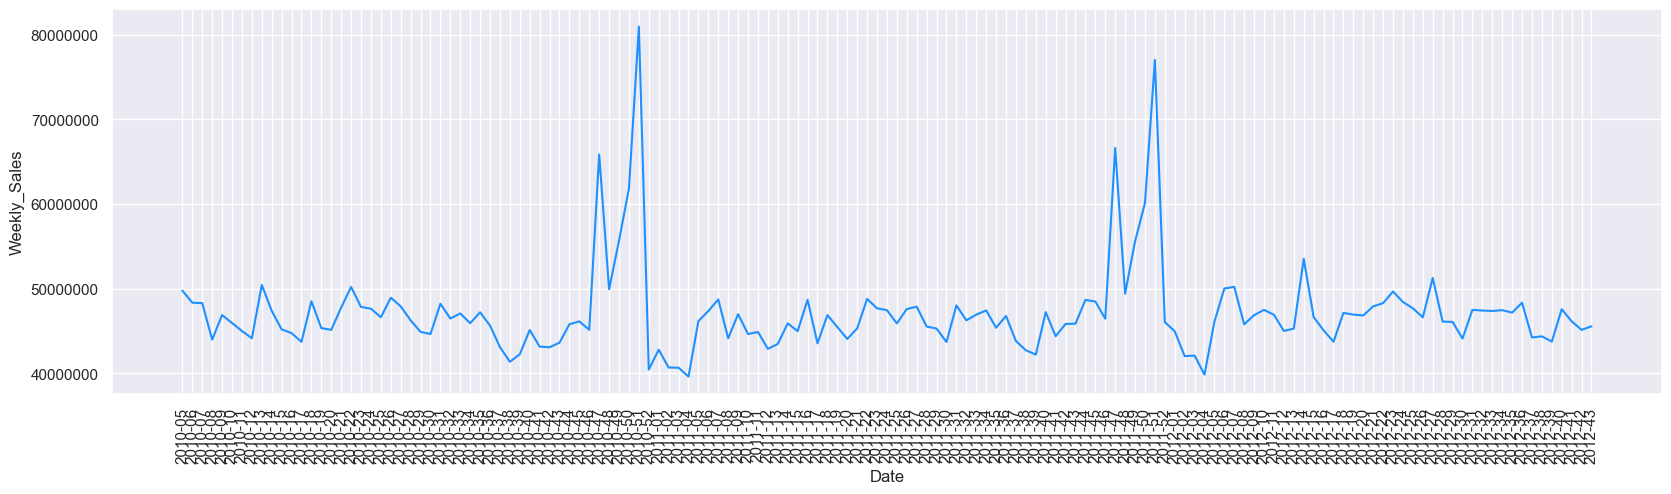

In [26]:
sns.lineplot(x=walmart_weekly_sales.index, y=walmart_weekly_sales.Weekly_Sales.fillna(np.inf), color='dodgerblue')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
plt.close()



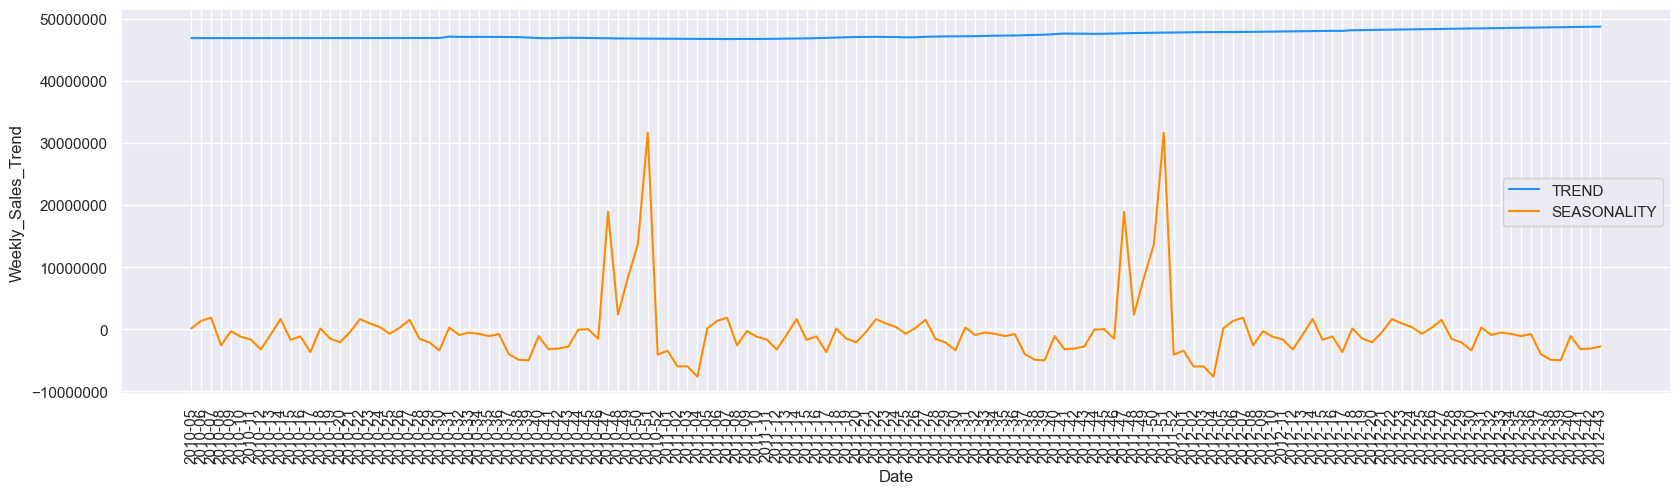

In [6]:
trend_seasonality = walmart_weekly_sales.copy()

# Decomposing the series into Trend and Seasonality
seas_decomp = seasonal_decompose(walmart_weekly_sales.Weekly_Sales, period=52, model='additive', extrapolate_trend='freq')
trend_seasonality['Weekly_Sales_Trend'] = seas_decomp.trend
trend_seasonality['Weekly_Sales_Seasonal'] = seas_decomp.seasonal

# Plot
    # Trend
sns.lineplot(x=trend_seasonality.index, y=trend_seasonality.Weekly_Sales_Trend, color='dodgerblue', label='TREND')
    # Seasonality
sns.lineplot(x=trend_seasonality.index, y=trend_seasonality.Weekly_Sales_Seasonal, color='darkorange', label='SEASONALITY')  
    # Plot formatting
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
plt.close()

## Model Implementation

#### Test Train Split

In [7]:
split_percentage = 0.75
split = int(len(walmart_weekly_sales)*split_percentage)

# DF split
walmart_train = walmart_weekly_sales[:split]
walmart_test = walmart_weekly_sales[split:]

# Series Split
train_data = walmart_train.Weekly_Sales.values
test_data = walmart_test.Weekly_Sales.values

#### Hyperparameter Tuning

In [8]:
order_aic_bic = []
model_number = 1

# Executing exhaustive search
for p in range(4):
    for d in range(1):
        for q in range(4):
            for P in range(2):
                for D in range(1):
                    for Q in range(2):
                        total_models = 64
                        try:
                            model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,52))
                            results = model.fit(disp=False)
                            order_aic_bic.append((p, d, q, P, D, Q, 52, results.aic, results.bic))
                            print(f'{model_number} / {total_models}')
                            model_number = model_number + 1
                        except:
                            print(f'{model_number} / {total_models}')
                            model_number = model_number + 1
                            continue

# Creating a DF with the results
order_df = pd.DataFrame(order_aic_bic, columns=['AR(p)', 'Diff(d)', 'MA(q)', 'SAR(P)', 'SDiff(D)', 'SMA(Q)', 'Seas(S)', 'AIC', 'BIC'])
sorted_order_df = order_df.sort_values('AIC')
print(sorted_order_df.head())

1 / 64
2 / 64
3 / 64
4 / 64
5 / 64
6 / 64
7 / 64
8 / 64
9 / 64
10 / 64
11 / 64
12 / 64
13 / 64
14 / 64
15 / 64
16 / 64
17 / 64
18 / 64
19 / 64
20 / 64
21 / 64
22 / 64
23 / 64
24 / 64
25 / 64
26 / 64
27 / 64
28 / 64
29 / 64
30 / 64
31 / 64
32 / 64
33 / 64
34 / 64
35 / 64
36 / 64
37 / 64
38 / 64
39 / 64
40 / 64
41 / 64
42 / 64
43 / 64
44 / 64
45 / 64
46 / 64


/Users/karthiktalluri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


47 / 64
48 / 64
49 / 64
50 / 64


/Users/karthiktalluri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


51 / 64
52 / 64
53 / 64
54 / 64


/Users/karthiktalluri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


55 / 64
56 / 64
57 / 64
58 / 64
59 / 64
60 / 64
61 / 64


/Users/karthiktalluri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/karthiktalluri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


62 / 64
63 / 64


/Users/karthiktalluri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


64 / 64
    AR(p)  Diff(d)  MA(q)  SAR(P)  SDiff(D)  SMA(Q)  Seas(S)          AIC  \
38      2        0      1       1         0       0       52  2880.073084   
58      3        0      2       1         0       0       52  3624.621084   
59      3        0      2       1         0       1       52  3626.612181   
43      2        0      2       1         0       1       52  3628.001905   
63      3        0      3       1         0       1       52  3628.010840   

            BIC  
38  2893.437229  
58  3643.330886  
59  3647.994812  
43  3646.711707  
63  3652.066299  


#### Optimal Model

In [9]:
sarima = SARIMAX(train_data, order=(0,1,1), seasonal_order=(1,1,0,52))

# Fitting th model
sarima_fit = sarima.fit()

# Summary Statistics of the model
sarima_summary = sarima_fit.summary()
print(sarima_summary)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19697D+01    |proj g|=  4.48506D+00


 This problem is unconstrained.



At iterate    5    f=  8.04005D+00    |proj g|=  7.90314D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   2.915D-07   8.040D+00
  F =   8.0400492977304800     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  107
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -860.285
Date:                             Tue, 02 Apr 2024   AIC                           17

#### Summary Statistics

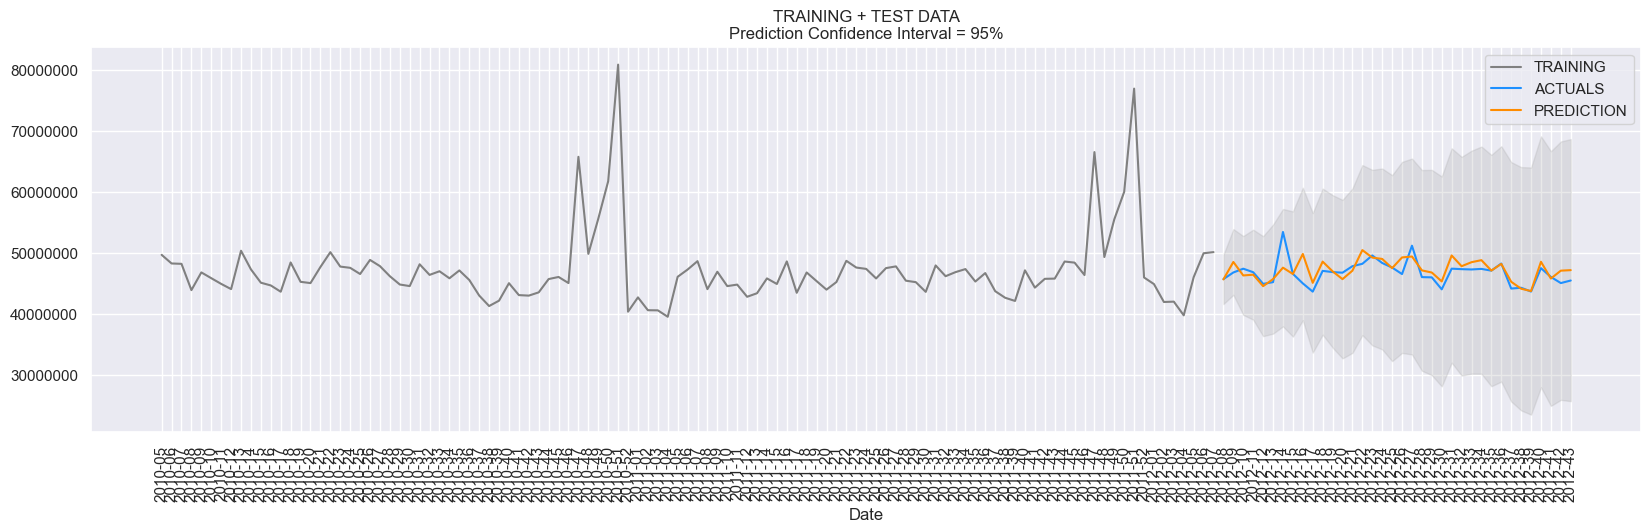

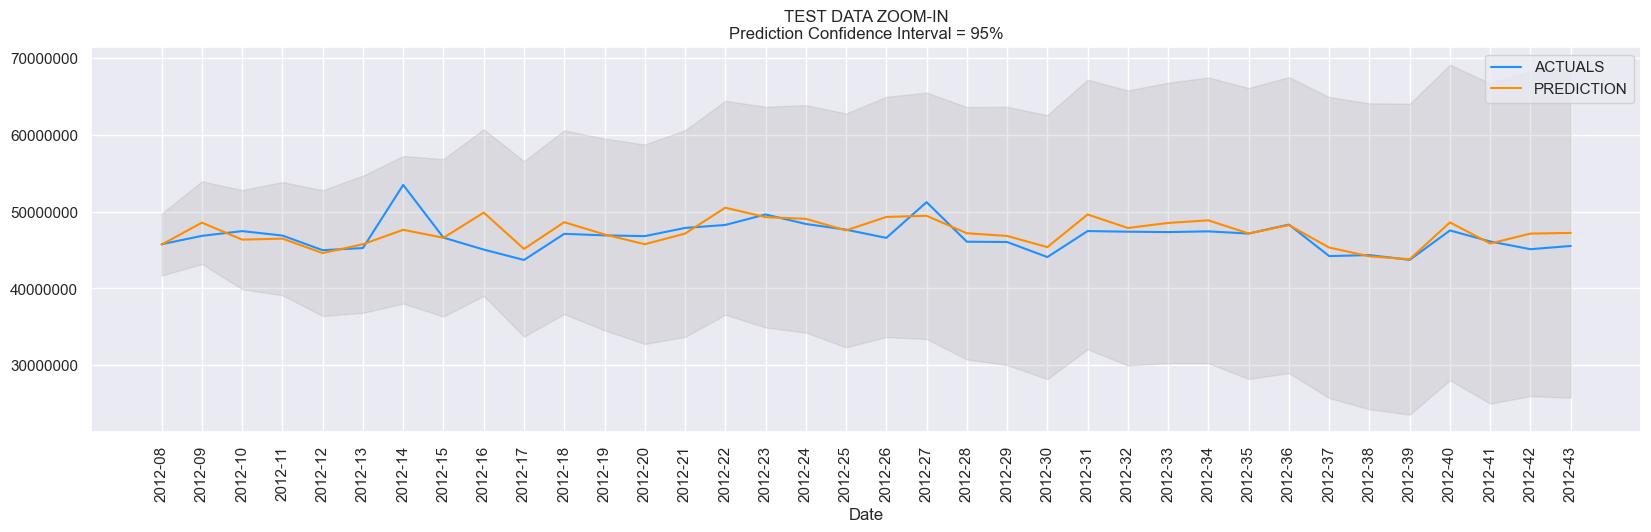

In [10]:
predictions = sarima_fit.get_forecast(len(test_data))
    # Mean and prediction interval data
pred_values = predictions.predicted_mean
pred_intervals = predictions.conf_int(alpha=0.05) # 95% Confidence
pred_int_low = pd.Series(pred_intervals[:,0], index=walmart_test.index)
pred_int_high = pd.Series(pred_intervals[:,1], index=walmart_test.index)

# Plot 1: Full data
    # Training data
sns.lineplot(x=walmart_train.index, y=train_data, color='grey', label='TRAINING')
    # Actuals data
sns.lineplot(x=walmart_test.index, y=test_data, color='dodgerblue', label='ACTUALS')
    # Prediction data
sns.lineplot(x=walmart_test.index, y=pred_values, color='darkorange', label='PREDICTION')
plt.fill_between(pred_int_low.index, pred_int_low, pred_int_high, color='darkgrey', alpha=0.25)
    # Plot formatting
plt.title('TRAINING + TEST DATA\nPrediction Confidence Interval = 95%')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
plt.close()

# Plot 2: Prediction Zoom-In
    # Actuals data
sns.lineplot(x=walmart_test.index, y=test_data, color='dodgerblue', label='ACTUALS')
    # Prediction Data
sns.lineplot(x=walmart_test.index, y=pred_values, color='darkorange', label='PREDICTION')
plt.fill_between(pred_int_low.index, pred_int_low, pred_int_high, color='darkgrey', alpha=0.25)
    # Plot formatting
plt.title('TEST DATA ZOOM-IN\nPrediction Confidence Interval = 95%')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
plt.close()

SUMMARY STATISTICS
Percentage Metrics
MAPE: 2.5%
MPE: 1.14%

Sales Metrics
MAE: 1181425
MSE: 2942211427179
RMSE: 1715287



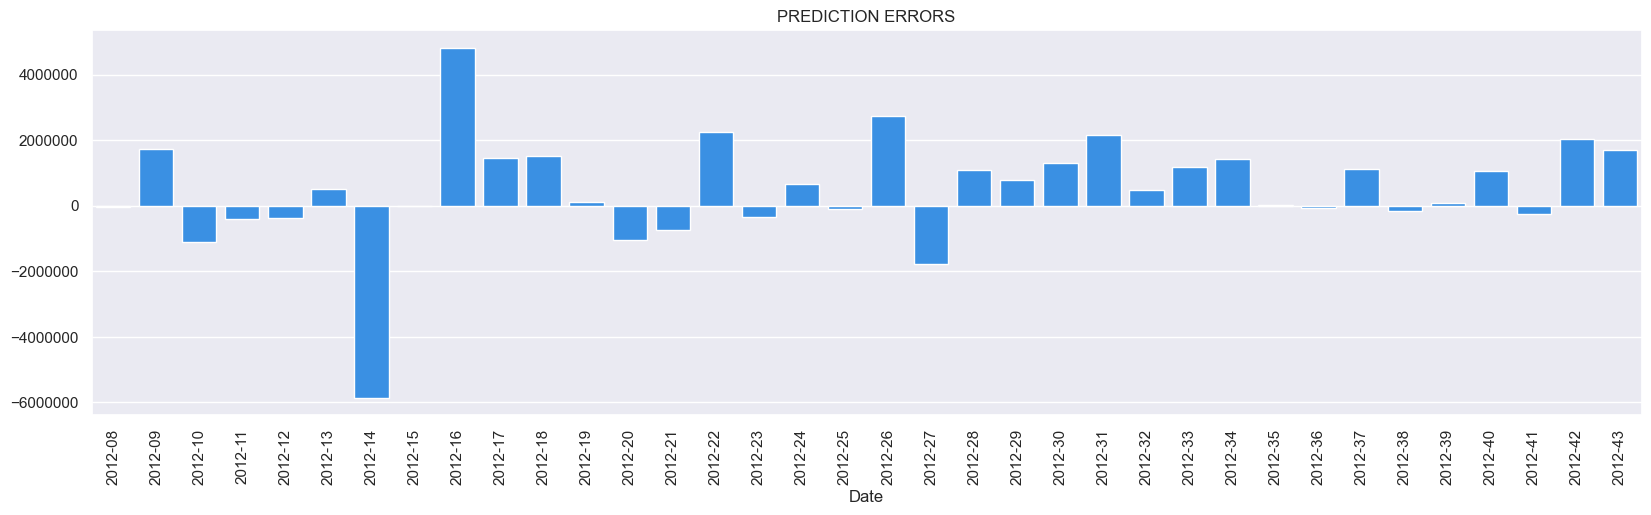

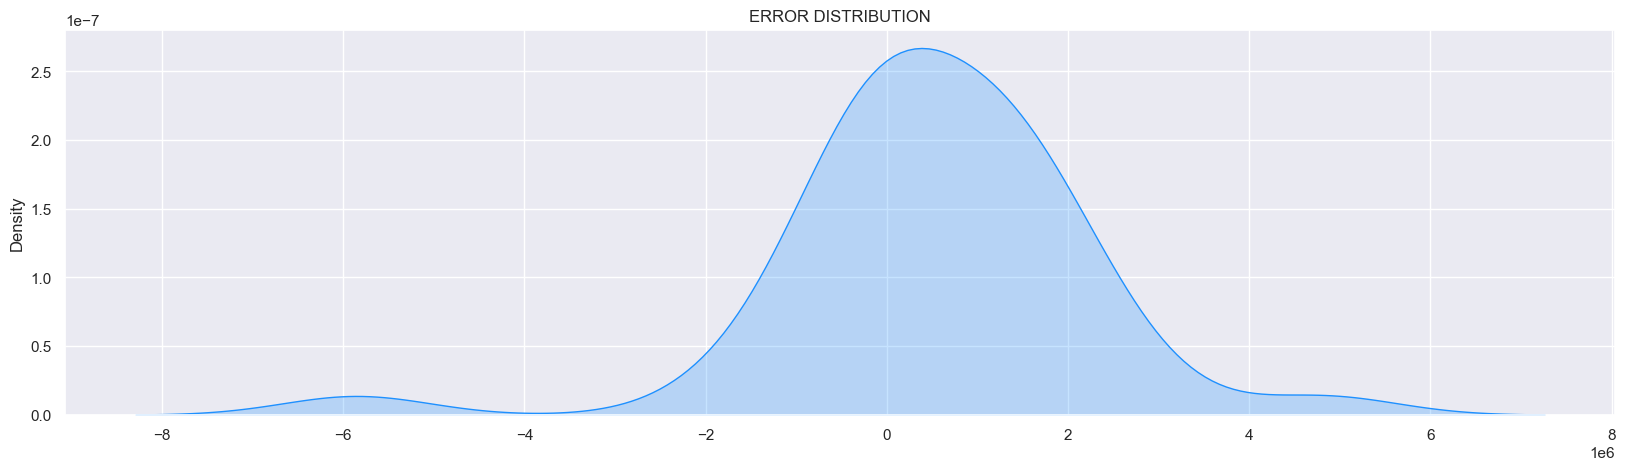

In [11]:
error = pred_values - test_data
error_perc = (pred_values- test_data) / test_data
    # Performance metrics
mae = mean_absolute_error(test_data, pred_values)
mse = mean_squared_error(test_data, pred_values)
rmse = np.sqrt(mse)
mpe = np.mean(error_perc) * 100
mape = (np.mean(abs(error_perc))*100)
print('SUMMARY STATISTICS')
print('Percentage Metrics')
print(f'MAPE: {mape.round(2)}%')
print(f'MPE: {mpe.round(2)}%\n')
print('Sales Metrics')
print(f'MAE: {int(mae)}')
print(f'MSE: {int(mse)}')
print(f'RMSE: {int(rmse)}\n')

# Plot 1: Error Values
sns.barplot(x=walmart_test.index, y=error, color='dodgerblue')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('PREDICTION ERRORS')
plt.show()
plt.close()

# Plot 2: Error Distribution

sns.kdeplot(x=error, color='dodgerblue', fill=True)
plt.title('ERROR DISTRIBUTION')
plt.show()
plt.close()

### Forecasting

In [12]:
forecast = pd.read_csv('test.csv', parse_dates=['Date'])
forecast['Date'] =  forecast.Date.dt.strftime('%Y-%U')
forecast = forecast.set_index(['Date'])[['Store']]
forecast = forecast.groupby(by=forecast.index).sum()
print(forecast.shape)
print(forecast.head())

(39, 1)
         Store
Date          
2012-44  65684
2012-45  66068
2012-46  65656
2012-47  65959
2012-48  65863


In [13]:
w39_forecast = sarima_fit.get_forecast(len(test_data)+len(forecast))
w39_fore_values = w39_forecast.predicted_mean[len(test_data):]
w39_fore_intervals = w39_forecast.conf_int(alpha=0.05)[len(test_data):] # 95% Confidence
fore_int_low = pd.Series(w39_fore_intervals[:,0], index=forecast.index)
fore_int_high = pd.Series(w39_fore_intervals[:,1], index=forecast.index)

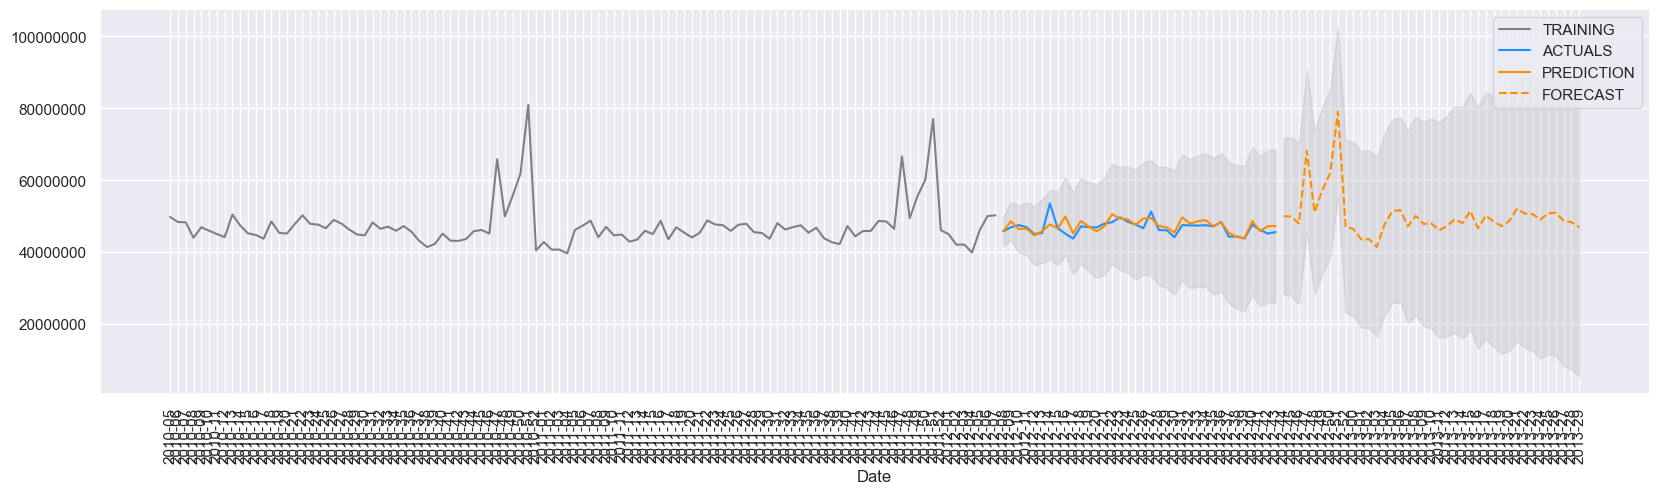

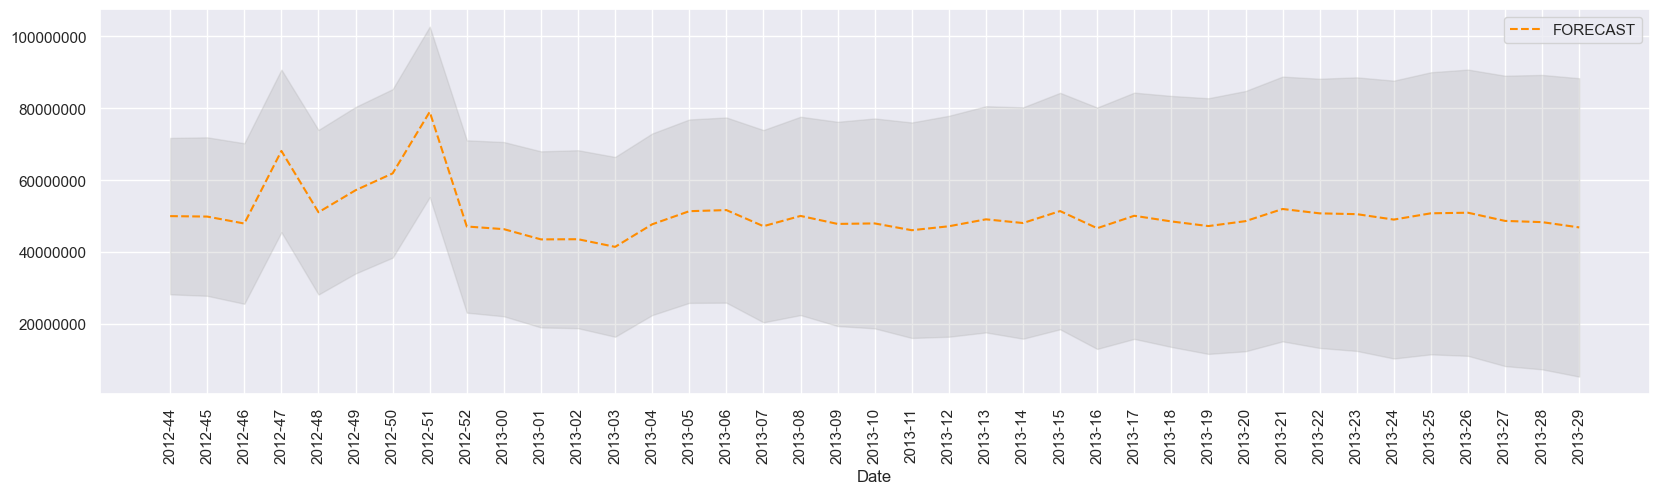

In [14]:
sns.lineplot(x=walmart_train.index, y=train_data, color='grey', label='TRAINING')
    # Actuals data
sns.lineplot(x=walmart_test.index, y=test_data, color='dodgerblue', label='ACTUALS')
    # Prediction data
sns.lineplot(x=walmart_test.index, y=pred_values, color='darkorange', label='PREDICTION')
plt.fill_between(pred_int_low.index, pred_int_low, pred_int_high, color='darkgrey', alpha=0.25)
    # Forecast data
sns.lineplot(x=forecast.index, y=w39_fore_values, color='darkorange', linestyle='--', label='FORECAST')
plt.fill_between(fore_int_low.index, fore_int_low, fore_int_high, color='darkgrey', alpha=0.25)
    # Plot formatting
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
plt.close()

# Plot 2: Forecast Zoom-In
    # Forecast data    
sns.lineplot(x=forecast.index, y=w39_fore_values, color='darkorange', linestyle='--', label='FORECAST')
plt.fill_between(fore_int_low.index, fore_int_low, fore_int_high, color='darkgrey', alpha=0.25)
    # Plot formatting
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
plt.close()


In [15]:
!pip3 install joblib

In [16]:
import joblib 
joblib.dump(sarima_fit, 'sarimax_model.pkl')

['sarimax_model.pkl']